# EDA of Obesity Dataset

# Importing required Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import warnings
from scipy.stats import chi2_contingency


# Reading train and test data in CSV file

In [2]:
pd.options.display.max_columns = None
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('Original_ObesityDataSet.csv')

# Checking no. of rows and columns in both datasets

In [3]:
print(f'The Training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns')
print(f'The Test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns')

The Training dataset has 20758 rows and 18 columns
The Test dataset has 2111 rows and 17 columns


# Looking at the first few observations of both datasets

In [4]:
pd.options.display.max_columns = None
display('Train:',train_df.head())
display('Test:',test_df.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
pd.options.display.max_columns = None
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


•	Gender: It is a categorical variable, having two values (Male/Female)

•	Age: It is a numerical variable, shows age of a person.

•	Height: It is a numerical variable, shows height a of person in meters.

•	Weight: It is a numerical variable shows weight of a person in kilograms.

•	Family history of overweight: It is a categorical variable, shows if anyone’s has family history of overweight/obese, having two values (Yes/No)

•	Frequently consumed high-calorie food (FAVC): It is a categorical variable, shows frequency of high calorie if the individual often eats high-calorie food (yes or no).

•	Frequency of consumption of vegetables (FCVC): It is ordinal variable that shows how often the individual eats vegetables (1 = never, 2 = sometimes, 3 = always).

•	Number of main meals (NCP): ordinal variable that shows how many main meals the individual has daily (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).

•	Consumption of food between meals (CAEC): ordinal variable that shows how often the individual eats food between meals (1 = no, 2 = sometimes, 3 = frequently, 4 = always).

•	SMOKE: categorical variable that shows whether the individual smokes or not (yes or no).

•	Consumption of water daily (CH2O): ordinal variable that shows how much water the individual drinks daily (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).

•	Monitor calorie intake (SCC): categorical variable that shows if the individual keeps track of their caloric intake (yes or no).

•	Frequency of physical activity (FAF): ordinal variable that shows how often the individual does physical activity (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).

•	Time using electronic devices (TUE): ordinal variable that shows how long the individual uses electronic devices (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).

•	Consumption of alcohol (CALC): ordinal variable that shows how often the individual drinks alcohol (1 = no, 2 = sometimes, 3 = frequently, 4 = always).

•	Type of transportation used (MTRANS): categorical variable that shows what kind of transportation the individual uses (automobile, motorbike, bike, public transportation, walking).

•	Level of obesity (NObeyesdad): ordinal variable that shows the obesity level of the individual according to their BMI (insufficient weight normal weight, overweight level I, overweight level II, obesity type I, obesity type II, obesity type III). It is the target 

# Here we can observe few things like Age should be int but its float same for FCVC, NCP, CH2O, FAF, TUE. We will deal with this later

In [6]:
pd.options.display.max_columns = None
test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# There is no any missing value in any column

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# Here we can see that we have categorical (Nominal/Ordinal) that we will deal later

In [9]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


# Here we can observe Id column doesn't provide any meaningful info, so I will drop it 

In [10]:
df_train_d = train_df.drop(columns=["id"])

In [11]:
df_train_d

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [12]:

# Calculate summary statistics
data_types = df_train_d.dtypes
missing_values = df_train_d.isnull().sum()
duplicate_counts = df_train_d.duplicated().sum()
unique_counts = df_train_d.nunique()
min_values = df_train_d.min()
max_values = df_train_d.max()

# Calculate mean and standard deviation for numeric columns
numeric_columns = df_train_d.select_dtypes(include=[np.number]).columns
avg_values = df_train_d[numeric_columns].mean()
std_dev_values = df_train_d[numeric_columns].std()

# Get the top value and its frequency for object columns
object_columns = df_train_d.select_dtypes(include=['object']).columns
top_values = df_train_d[object_columns].mode().iloc[0]
freq_counts = df_train_d[object_columns].apply(lambda x: x.value_counts().max())

# Create the summary DataFrame
summary_df = pd.DataFrame({
    'Data Type': data_types,
    'Missing': missing_values,
    'Duplicate': duplicate_counts,
    'Unique': unique_counts,
    'Min': min_values,
    'Max': max_values,
    'avg': avg_values,
    'Std dev': std_dev_values,
    'top value': top_values,
    'Freq': freq_counts
})

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the summary DataFrame
summary_df


,Data Type,Missing,Duplicate,Unique,Min,Max,avg,Std dev,top value,Freq
Age,float64,0,0,1703,14.0,61.0,23.841804,5.688072,NaN,NaN
CAEC,object,0,0,4,Always,no,NaN,NaN,Sometimes,17529.0
CALC,object,0,0,3,Frequently,no,NaN,NaN,Sometimes,15066.0
CH2O,float64,0,0,1506,1.0,3.0,2.029418,0.608467,NaN,NaN
FAF,float64,0,0,1360,0.0,3.0,0.981747,0.838302,NaN,NaN
FAVC,object,0,0,2,no,yes,NaN,NaN,yes,18982.0
FCVC,float64,0,0,934,1.0,3.0,2.445908,0.533218,NaN,NaN
Gender,object,0,0,2,Female,Male,NaN,NaN,Female,10422.0
Height,float64,0,0,1833,1.45,1.975663,1.700245,0.087312,NaN,NaN
MTRANS,object,0,0,5,Automobile,Walking,NaN,NaN,Public_Transportation,16687.0


In [13]:
# Here CH2O, FAF, FCVC, NCP TUE have alot of unique values due to float values but these are actually 
# ordinal variables and we will deal them later.

In [14]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(df_train_d)
categorical_vars.remove('NObeyesdad')

print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)


Continuous Variables: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


# We can see the continuous and categorical attributes 

# Before going further into Data Exploration let's do some data cleaning.

In [15]:
print(df_train_d['Age']) 
#As we can see Age is float here but it should be integer so we will round it off and change type 

0        24.443011
1        18.000000
2        18.000000
3        20.952737
4        31.641081
           ...    
20753    25.137087
20754    18.000000
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 20758, dtype: float64


In [16]:
#First lets see Age statistics before applying functions, so that we can make sure that we don't
# lose any valuable information

OG_Age_stats = df_train_d['Age'].describe()
OG_Age_stats

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

In [17]:
# Round the age to the nearest whole number
df = df_train_d
df['age_rounded'] = df['Age'].round().astype(int)

In [18]:
print(df['age_rounded']) 

0        24
1        18
2        18
3        21
4        32
         ..
20753    25
20754    18
20755    20
20756    34
20757    27
Name: age_rounded, Length: 20758, dtype: int32


In [19]:
# Cleaned statistics
cleaned_age_stats = df['age_rounded'].describe()

# Display cleaned statistics
cleaned_age_stats


count    20758.000000
mean        23.850371
std          5.700779
min         14.000000
25%         20.000000
50%         23.000000
75%         26.000000
max         61.000000
Name: age_rounded, dtype: float64

In [20]:
df_train_d

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_rounded
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,24
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,18
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,18
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,21
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,25
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,18
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,20
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,34


In [21]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_rounded
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,24
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,18
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,18
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,21
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,25
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,18
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,20
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,34


Mean:
Before: 23.841804
After: 23.850371
The mean value has increased slightly, indicating a minimal impact on the central tendency of the data due to rounding. 
Same for the other values too like Std, min, max. It shows there is no any loss of valuable information after rounding off and change of data type

Lets change the categorical (ordinal) attributes which are in float to integer using round, astype clip functions

Statistics for FCVC:
count    20758.000000
mean         2.445908
std          0.533218
min          1.000000
25%          2.000000
50%          2.393837
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64


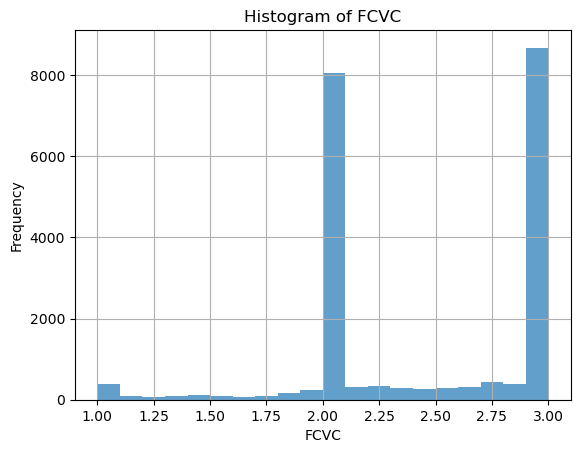

Statistics for NCP:
count    20758.000000
mean         2.761332
std          0.705375
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64


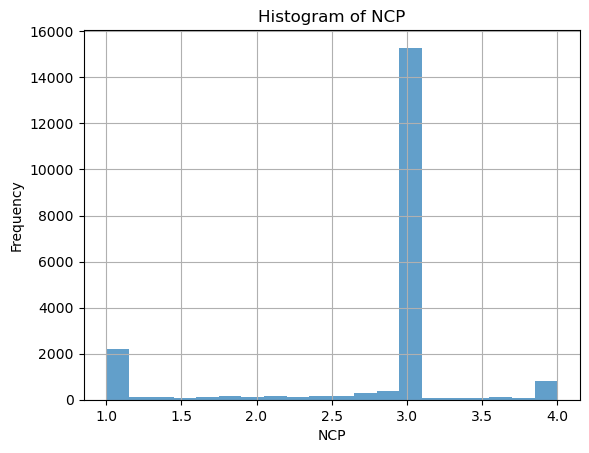

Statistics for CH2O:
count    20758.000000
mean         2.029418
std          0.608467
min          1.000000
25%          1.792022
50%          2.000000
75%          2.549617
max          3.000000
Name: CH2O, dtype: float64


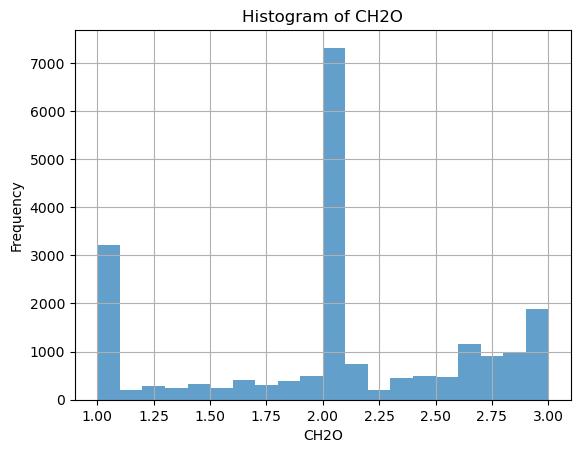

Statistics for FAF:
count    20758.000000
mean         0.981747
std          0.838302
min          0.000000
25%          0.008013
50%          1.000000
75%          1.587406
max          3.000000
Name: FAF, dtype: float64


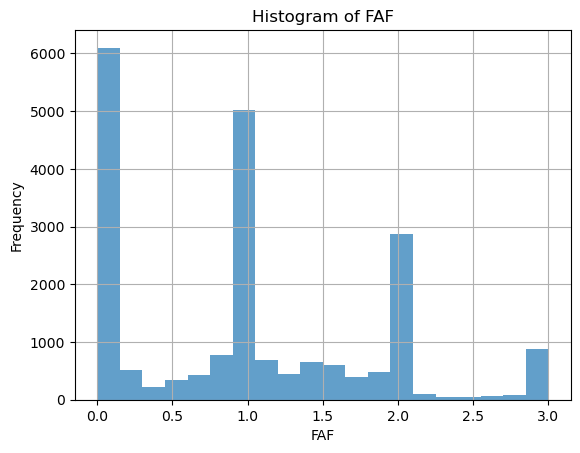

Statistics for TUE:
count    20758.000000
mean         0.616756
std          0.602113
min          0.000000
25%          0.000000
50%          0.573887
75%          1.000000
max          2.000000
Name: TUE, dtype: float64


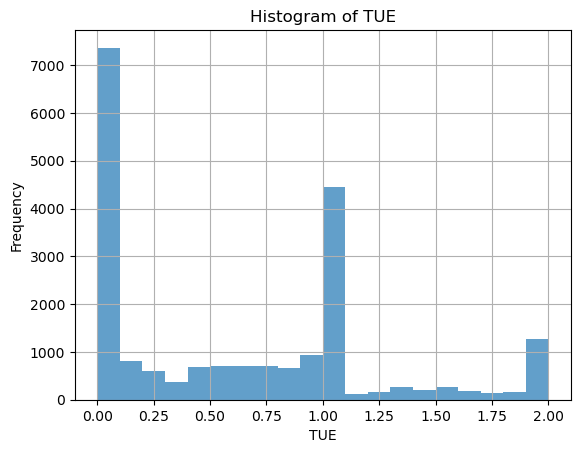

Statistics for FCVC:
count    20758.000000
mean         2.449802
std          0.565896
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64


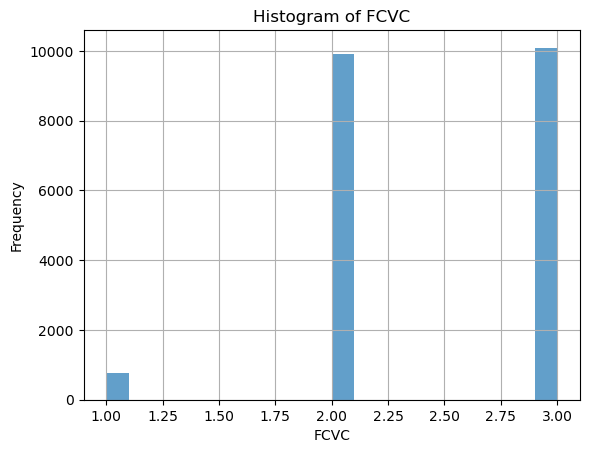

Statistics for NCP:
count    20758.000000
mean         2.764958
std          0.722398
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64


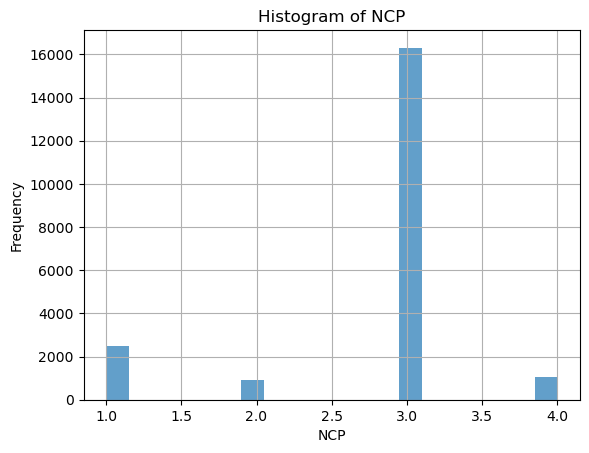

Statistics for CH2O:
count    20758.000000
mean         2.054581
std          0.681172
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: CH2O, dtype: float64


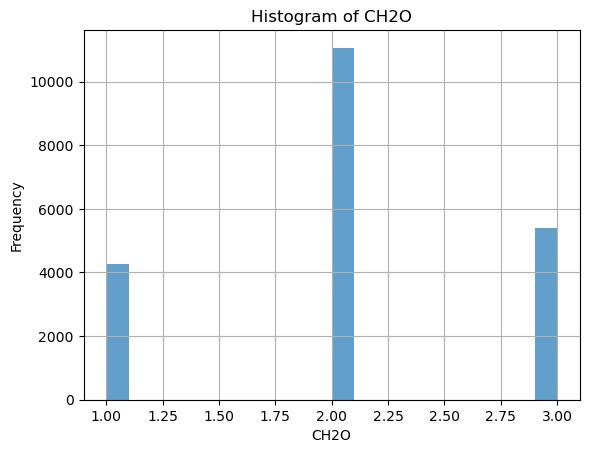

Statistics for FAF:
count    20758.000000
mean         0.985548
std          0.867857
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: FAF, dtype: float64


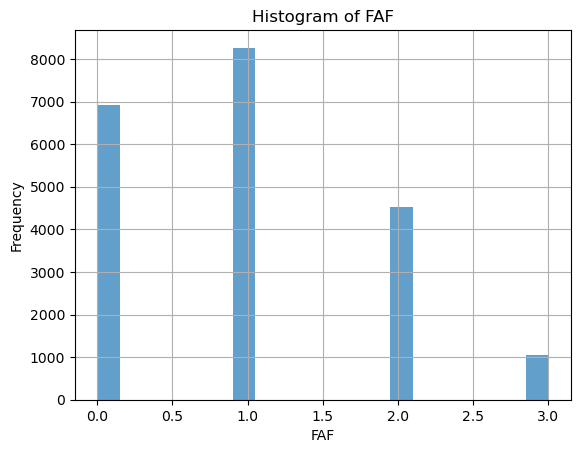

Statistics for TUE:
count    20758.000000
mean         0.624771
std          0.655701
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: TUE, dtype: float64


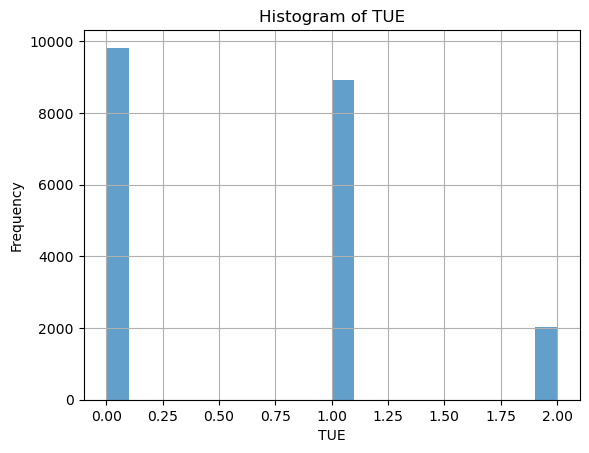

In [22]:

df_original = df.copy()

# This function will help to analyze the distribution of the data before and after transformation
def analyze_data(column):
    print(f"Statistics for {column}:")
    print(df[column].describe())
    df[column].hist(bins=20, alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Analyze each attribute
attributes = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for attribute in attributes:
    analyze_data(attribute)

# Round the float values to the nearest integer
df['FCVC'] = df['FCVC'].round().astype(int)
df['NCP'] = df['NCP'].round().astype(int)
df['CH2O'] = df['CH2O'].round().astype(int)
df['FAF'] = df['FAF'].round().astype(int)
df['TUE'] = df['TUE'].round().astype(int)

# Ensure the values are within the valid range for each attribute
df['FCVC'] = df['FCVC'].clip(1, 3)
df['NCP'] = df['NCP'].clip(1, 4)
df['CH2O'] = df['CH2O'].clip(1, 3)
df['FAF'] = df['FAF'].clip(0, 3)
df['TUE'] = df['TUE'].clip(0, 3)

# Function to visualize before and after
def compare_distributions(attributes):
    fig, axes = plt.subplots(len(attributes), 2, figsize=(12, len(attributes) * 6))
    for i, attribute in enumerate(attributes):
        df_original[attribute].hist(ax=axes[i, 0], bins=20, alpha=0.7)
        axes[i, 0].set_title(f"Original {attribute}")
        df[attribute].hist(ax=axes[i, 1], bins=20, alpha=0.7)
        axes[i, 1].set_title(f"Transformed {attribute}")
    plt.tight_layout()
    plt.show()

# Compare distributions for each attribute
#attributes = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
#compare_distributions(attributes)
# Visualize the data after rounding and clipping
for attribute in attributes:
    analyze_data(attribute)


In [23]:
df_train_d.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_rounded
0,Male,24.443011,1.699998,81.669950,yes,yes,2,3,Sometimes,no,3,no,0,1,Sometimes,Public_Transportation,Overweight_Level_II,24
1,Female,18.000000,1.560000,57.000000,yes,yes,2,3,Frequently,no,2,no,1,1,no,Automobile,Normal_Weight,18
2,Female,18.000000,1.711460,50.165754,yes,yes,2,1,Sometimes,no,2,no,1,2,no,Public_Transportation,Insufficient_Weight,18
3,Female,20.952737,1.710730,131.274851,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III,21
4,Male,31.641081,1.914186,93.798055,yes,yes,3,2,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Overweight_Level_II,32


In [24]:
# The slight shifts in mean and standard deviation across attributes suggest that rounding
# and clipping did not lead to a significant loss of valuable information.

# Target distribution

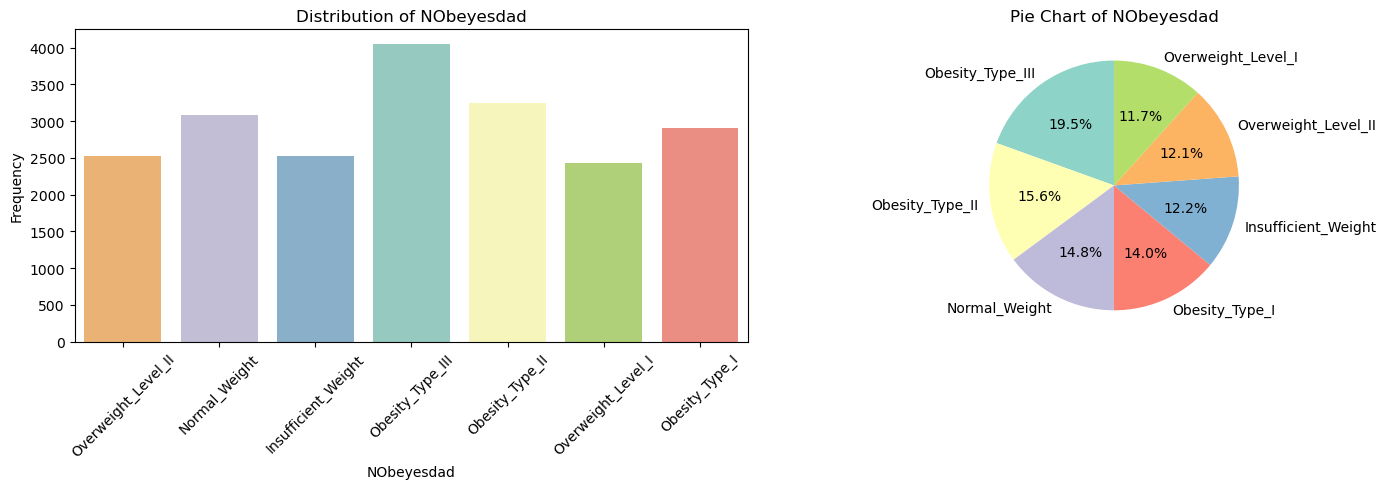

In [25]:

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts
nobeysdad_counts = train_df['NObeyesdad'].value_counts()
categories = nobeysdad_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=df_train_d, x='NObeyesdad', palette=color_map, ax=axes[0])
axes[0].set_xlabel('NObeyesdad')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of NObeyesdad')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(nobeysdad_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Pie Chart of NObeyesdad')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Distribution of all other categorical attributes 

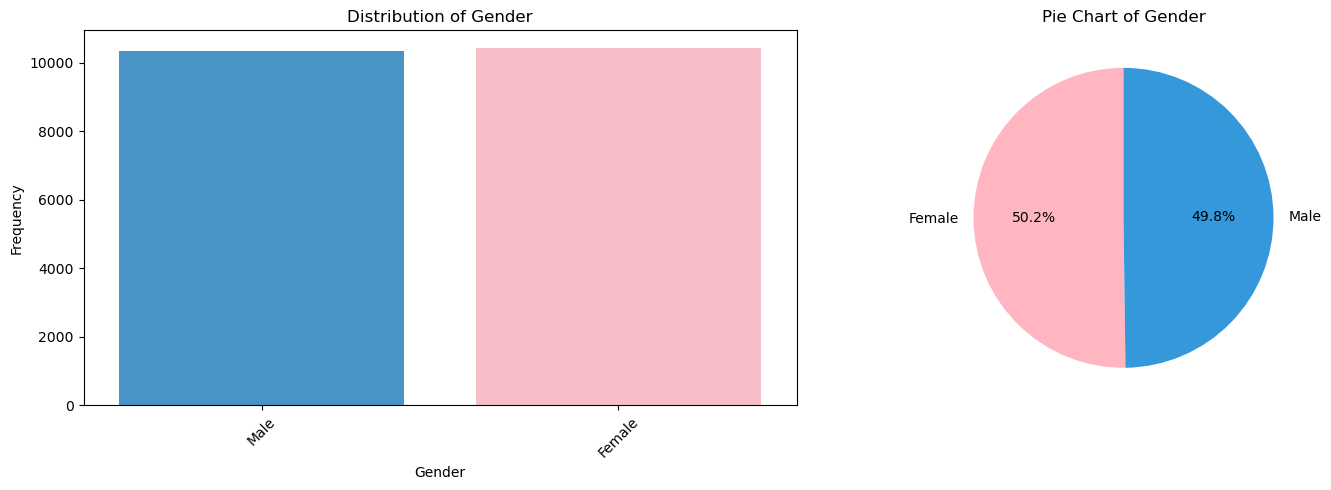

In [26]:
gender_palette = [ "#3498db", "#FFB6C1",]  

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for Gender
sns.countplot(data=train_df, x='Gender', palette=gender_palette, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Gender')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart for Gender
# Get value counts for Gender
gender_counts = df_train_d['Gender'].value_counts()
# Plot the pie chart
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(["#FFB6C1", "#3498db"]))
axes[1].set_title('Pie Chart of Gender')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


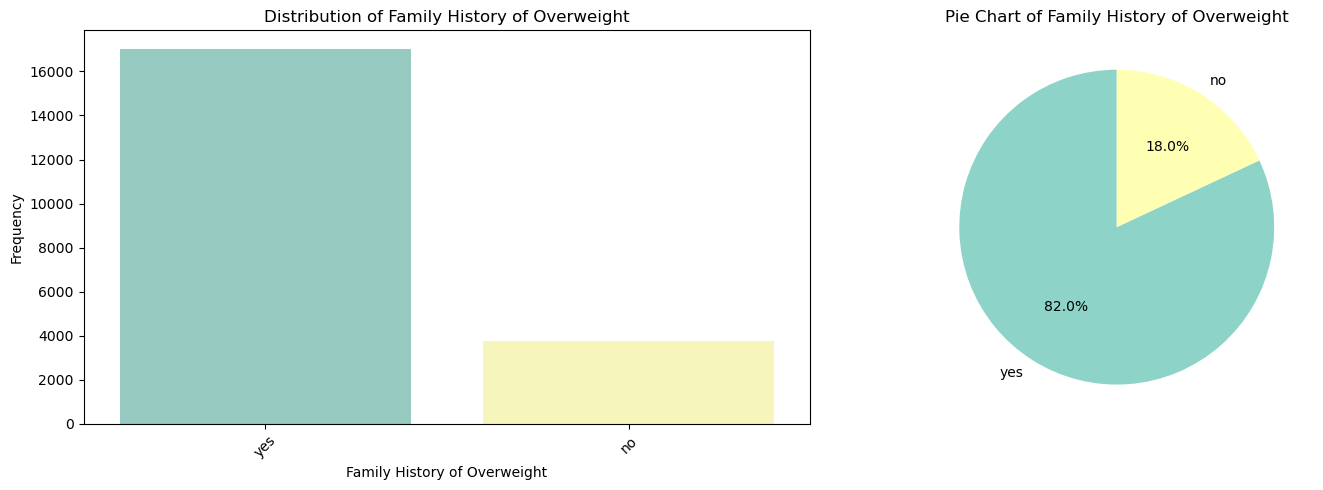

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts for family_history_overweight
family_history_counts = df_train_d['family_history_with_overweight'].value_counts()
categories = family_history_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=train_df, x='family_history_with_overweight', palette=color_map, ax=axes[0])
axes[0].set_xlabel('Family History of Overweight')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Family History of Overweight')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(family_history_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Pie Chart of Family History of Overweight')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

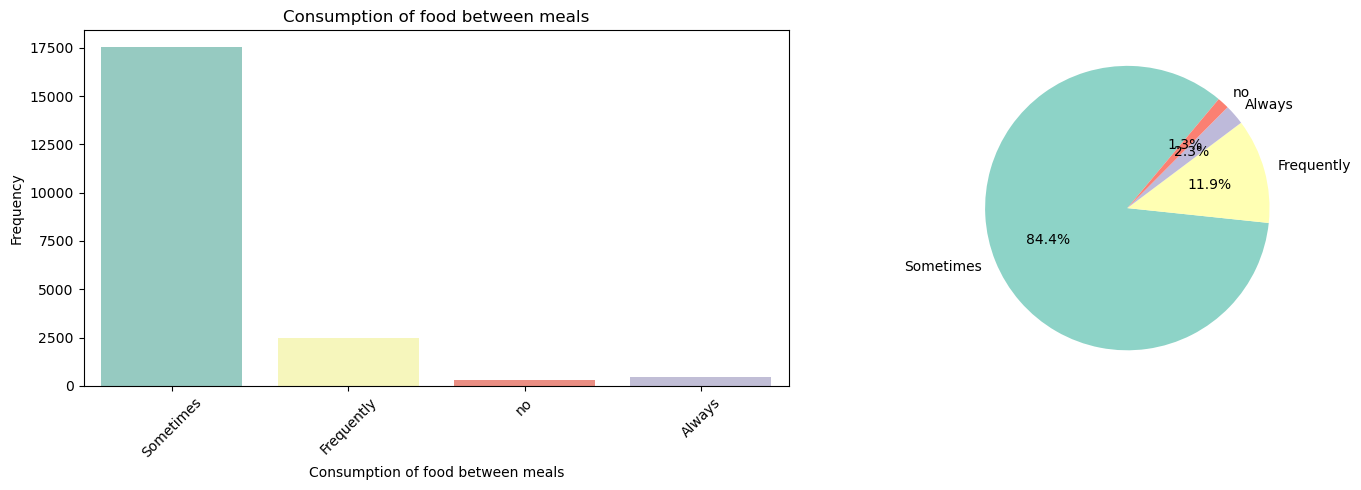

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts for family_history_overweight
family_history_counts = df_train_d['CAEC'].value_counts()
categories = family_history_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=train_df, x='CAEC', palette=color_map, ax=axes[0])
axes[0].set_xlabel('Consumption of food between meals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Consumption of food between meals')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(family_history_counts, labels=categories, autopct='%1.1f%%', startangle=50, colors=colors)
axes[1].set_title('')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

1.3 for No and 2.3 for Always

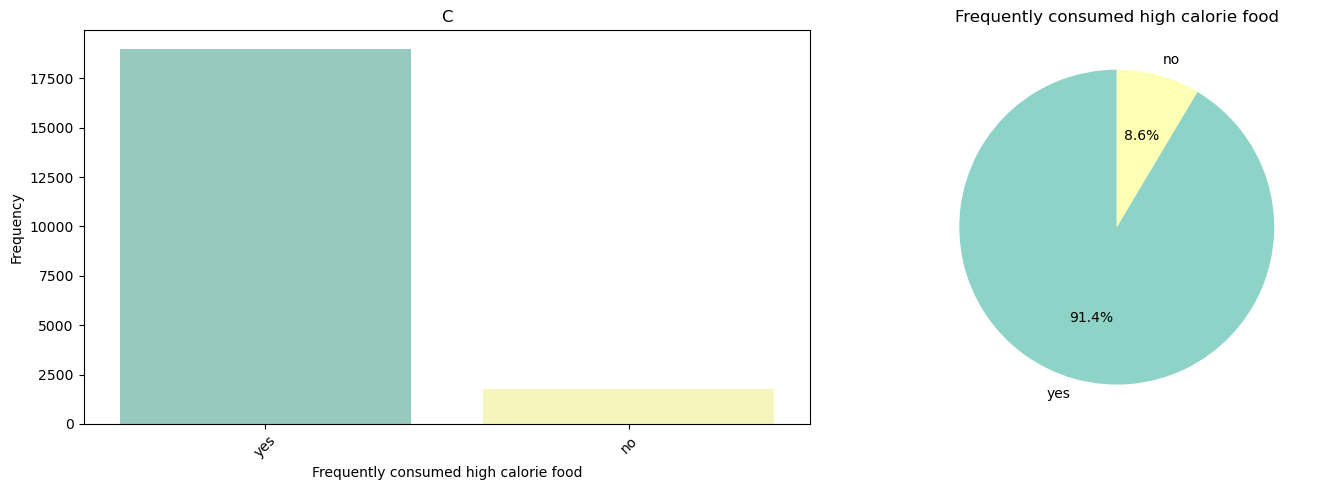

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts for family_history_overweight
family_history_counts = df_train_d['FAVC'].value_counts()
categories = family_history_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=train_df, x='FAVC', palette=color_map, ax=axes[0])
axes[0].set_xlabel('Frequently consumed high calorie food')
axes[0].set_ylabel('Frequency')
axes[0].set_title('C')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(family_history_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Frequently consumed high calorie food')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

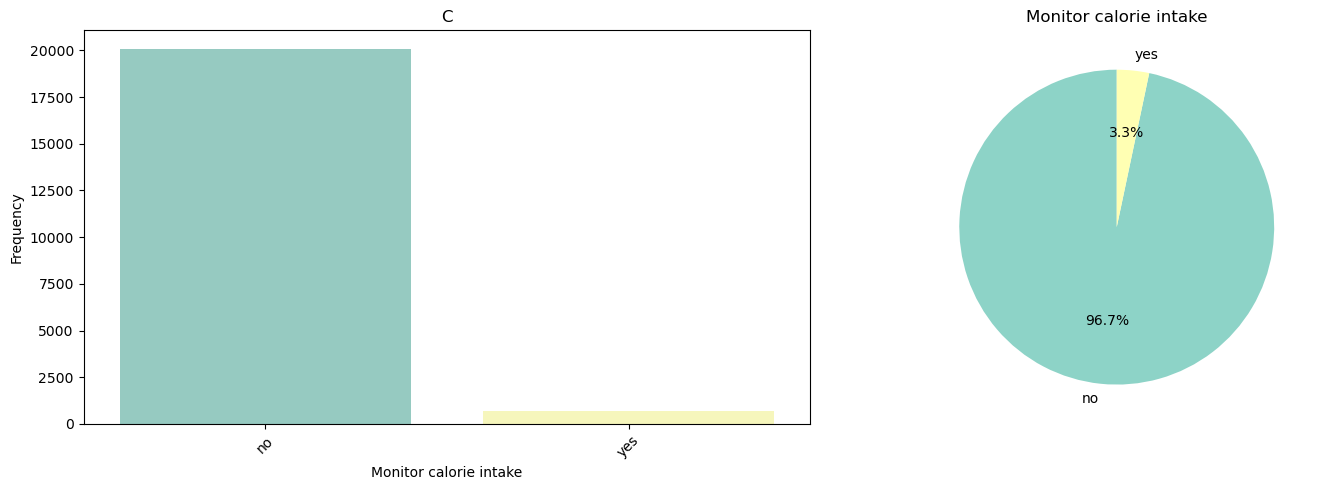

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts for family_history_overweight
family_history_counts = df_train_d['SCC'].value_counts()
categories = family_history_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=train_df, x='SCC', palette=color_map, ax=axes[0])
axes[0].set_xlabel('Monitor calorie intake')
axes[0].set_ylabel('Frequency')
axes[0].set_title('C')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(family_history_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Monitor calorie intake')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

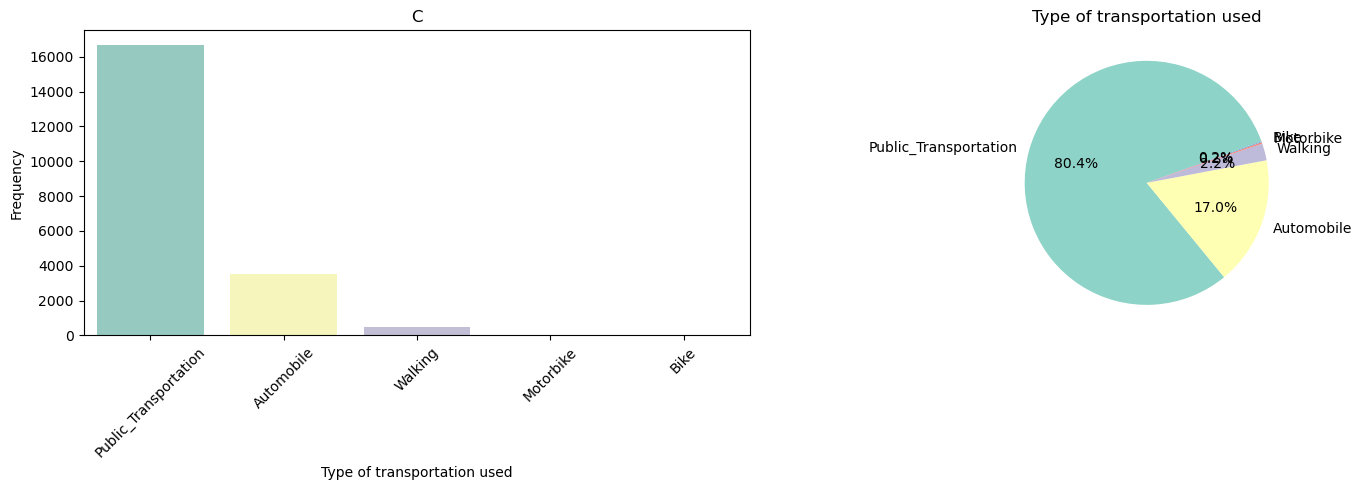

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts for family_history_overweight
family_history_counts = df_train_d['MTRANS'].value_counts()
categories = family_history_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=train_df, x='MTRANS', palette=color_map, ax=axes[0])
axes[0].set_xlabel('Type of transportation used')
axes[0].set_ylabel('Frequency')
axes[0].set_title('C')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(family_history_counts, labels=categories, autopct='%1.1f%%', startangle=20, colors=colors)
axes[1].set_title('Type of transportation used')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

0.2 for Bike and 2.2 for walking

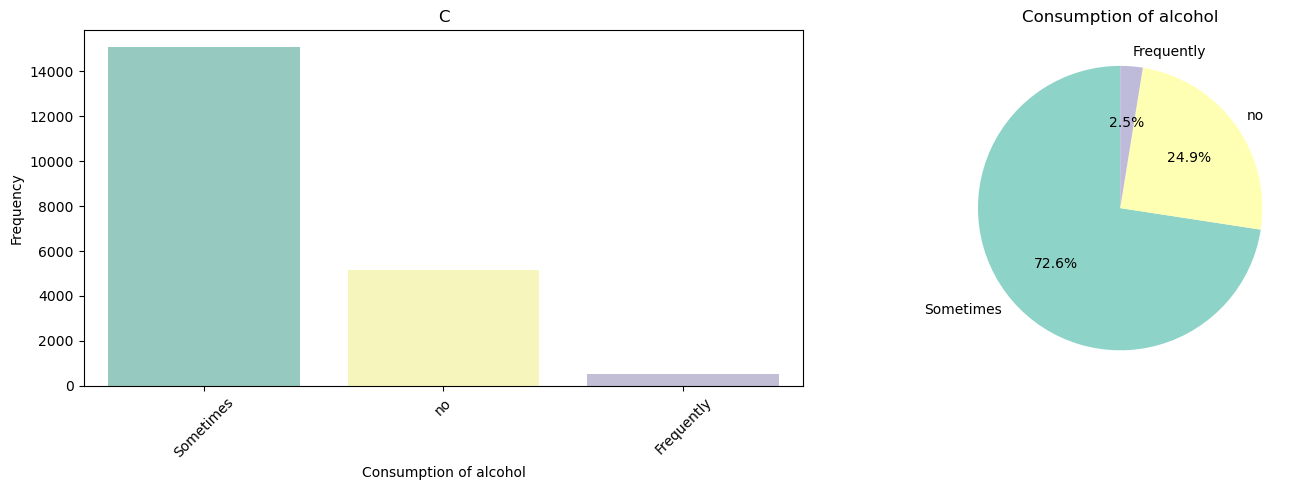

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Get unique categories and their counts for family_history_overweight
family_history_counts = df_train_d['CALC'].value_counts()
categories = family_history_counts.index

# Create a color palette
palette = sns.color_palette('Set3', len(categories))
color_map = dict(zip(categories, palette))

# Histogram
sns.countplot(data=train_df, x='CALC', palette=color_map, ax=axes[0])
axes[0].set_xlabel('Consumption of alcohol')
axes[0].set_ylabel('Frequency')
axes[0].set_title('C')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
# Map colors to the categories for the pie chart
colors = [color_map[category] for category in categories]

# Plot the pie chart
axes[1].pie(family_history_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Consumption of alcohol')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Distribution of Numeric attributes

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
color_list1 = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
color_list = ["#FFB6C1", "#FFDAB9", "#E6E6FA", "#D8BFD8", "#FFE4E1"]

cmap_custom = ListedColormap(color_list)
categorical_features = df_train_d.columns[df_train_d.dtypes=="object"].tolist()
numeric_features = train_df.columns[train_df.dtypes!="object"].tolist()

In [47]:
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

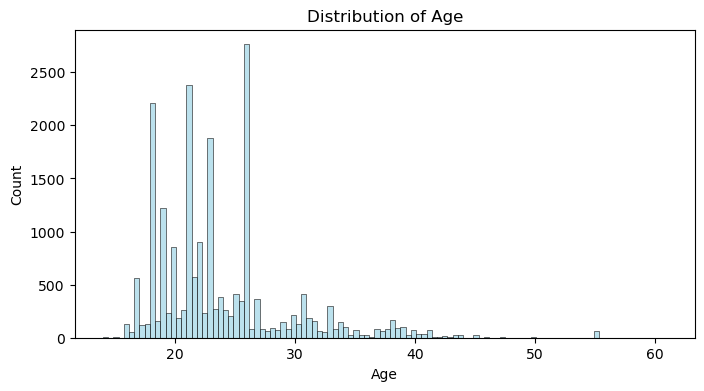

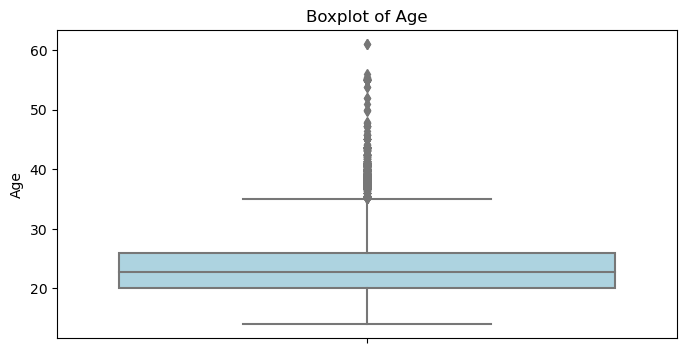

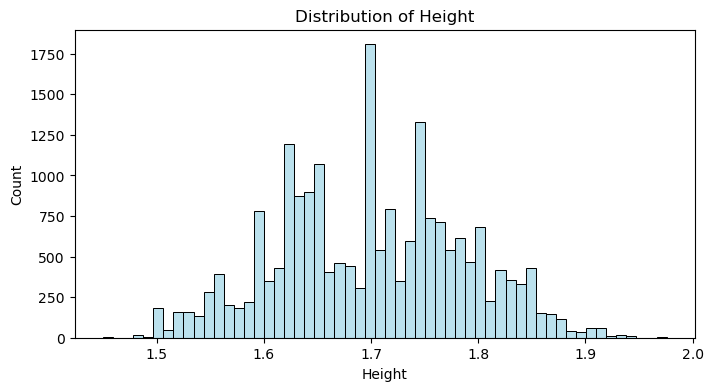

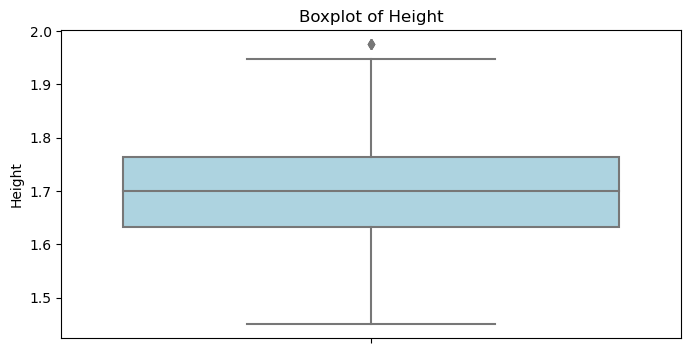

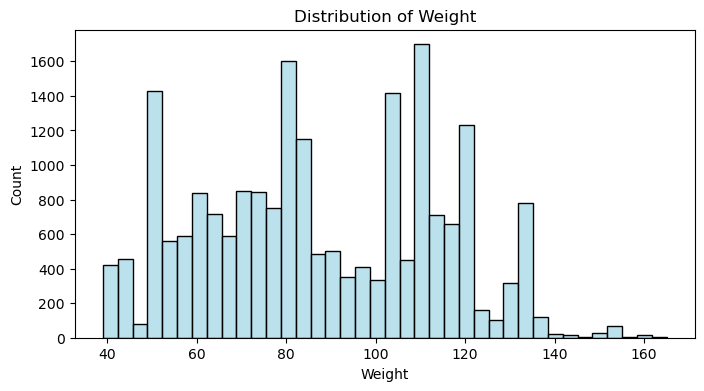

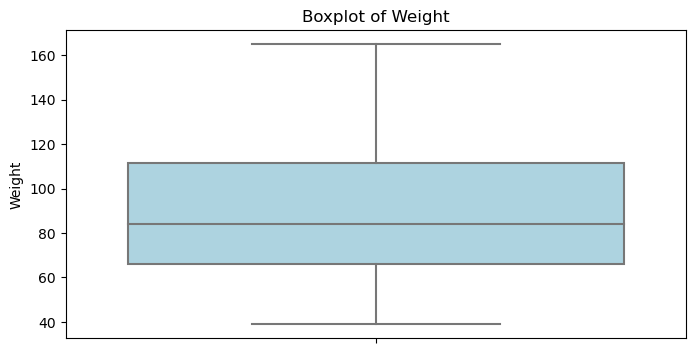

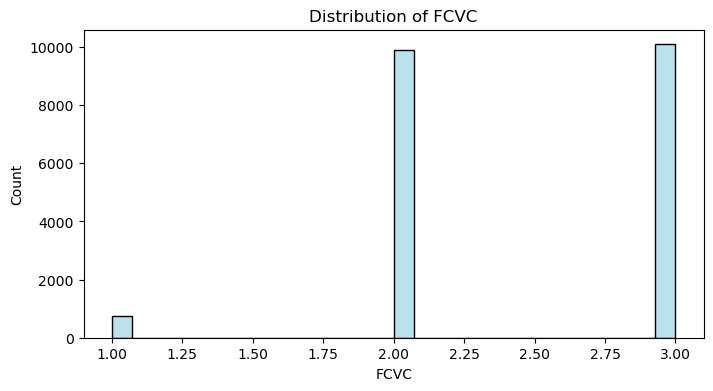

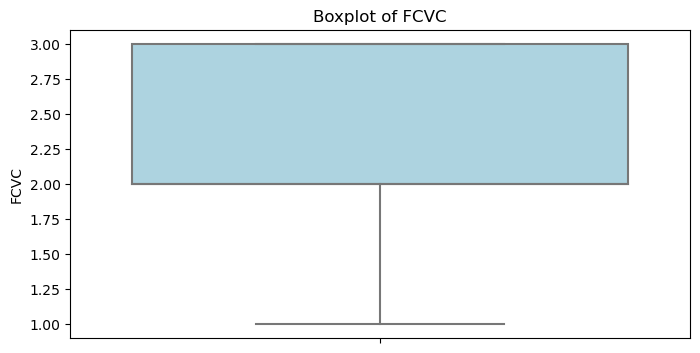

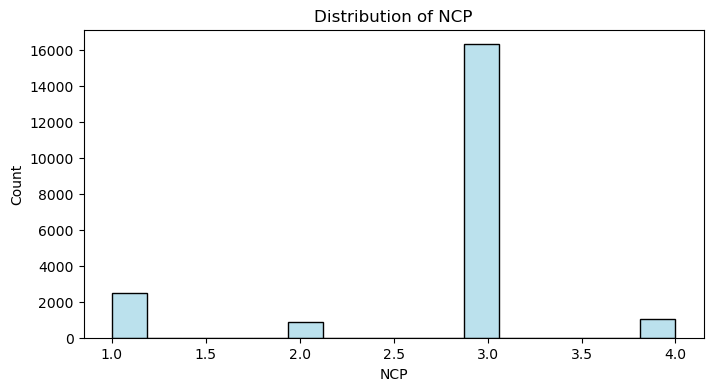

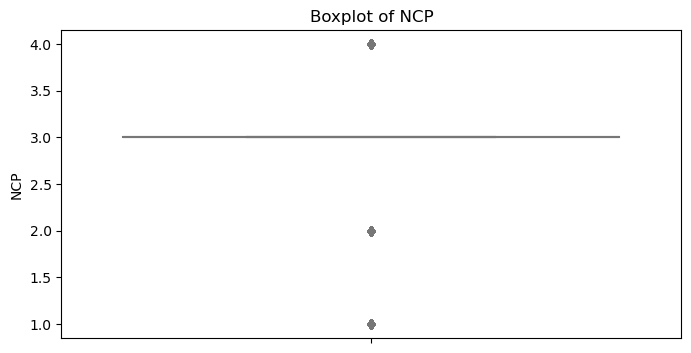

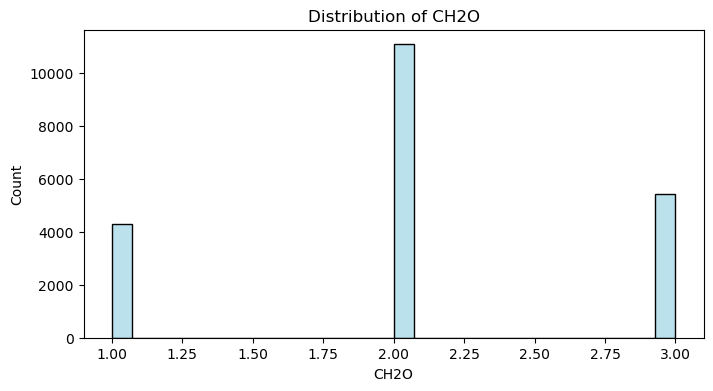

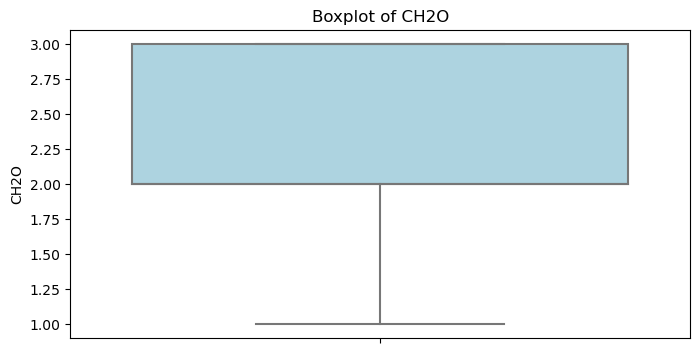

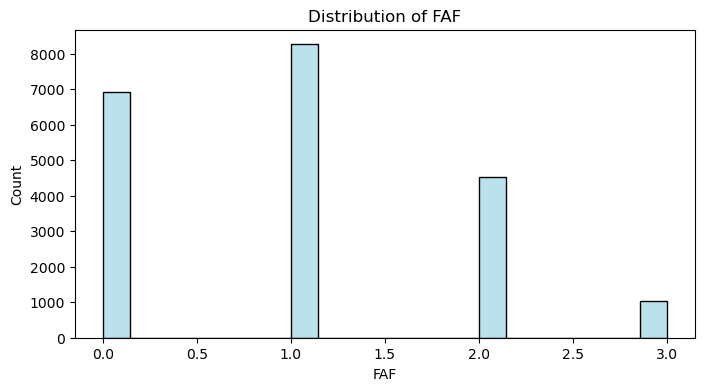

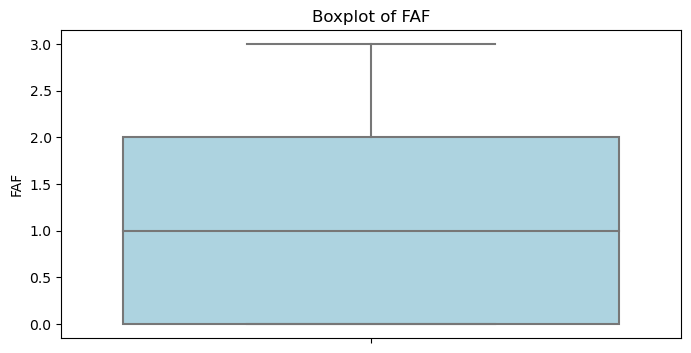

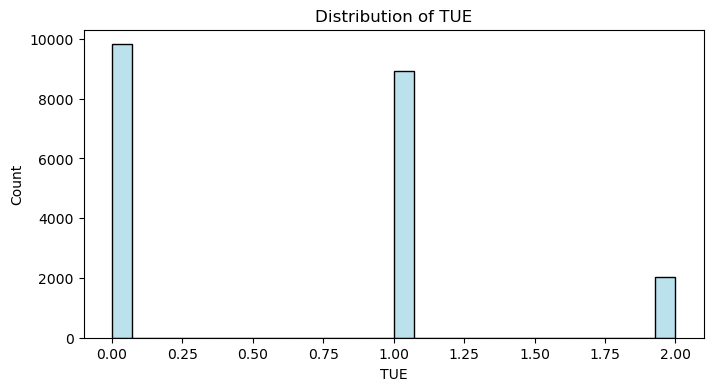

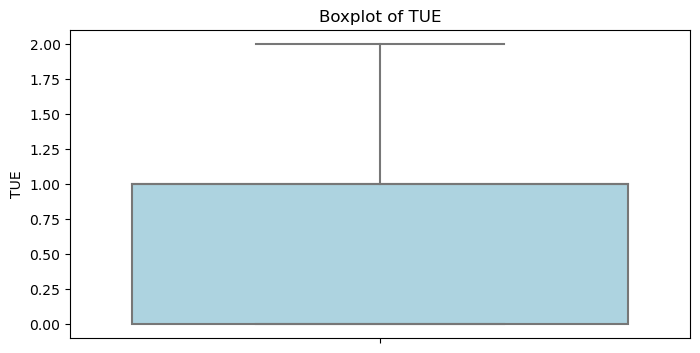

In [37]:

def plot_distribution(train_df, feature, palette=None):
    data_df = df_train_d.copy()
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        g = sns.histplot(data_df[feature], color=palette[0], ax=ax)
    ax.set_title(f"Distribution of {feature}")
    plt.show()

def plot_boxplot(train_df, feature, palette=None):
    data_df = df_train_d.copy()
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        g = sns.boxplot(y=feature, data=data_df, palette=palette, ax=ax)
    ax.set_title(f"Boxplot of {feature}")
    plt.show()

# Ensure continuous_vars, train_df, and color_list are defined
try:
    continuous_vars
    train_df
    color_list
except NameError as e:
    print(f"Variable not defined: {e}")

for feature in continuous_vars:
    plot_distribution(df_train_d, feature, palette=color_list1)
    plot_boxplot(train_df, feature, palette=color_list1)


# Paried train/test distribution of categorical variables

In [ ]:
train_df

In [ ]:
df_t = train_df.drop(columns=["id","NObeyesdad"])

In [ ]:
df_t

In [ ]:
test_df

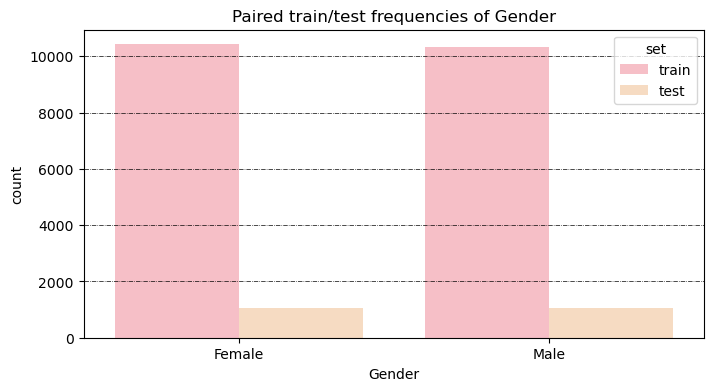

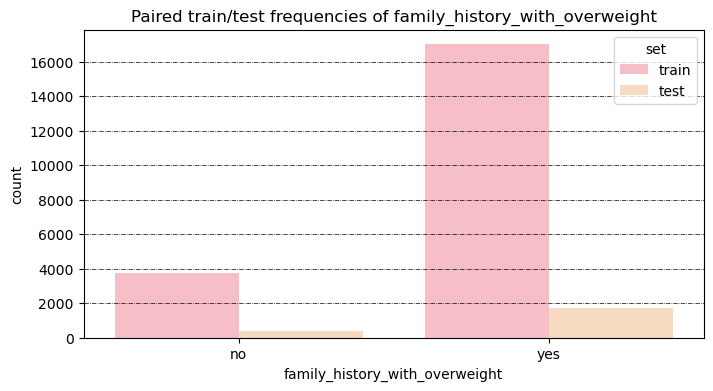

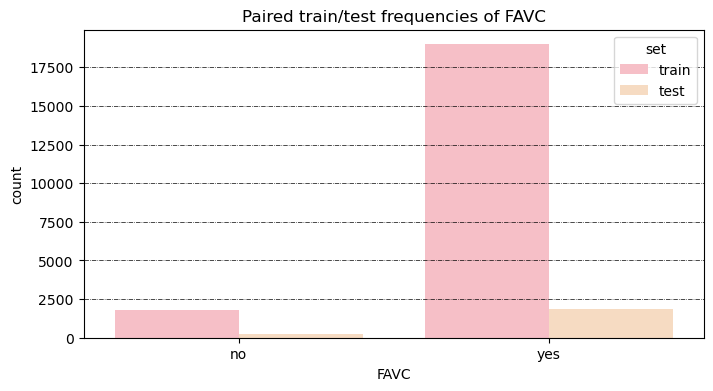

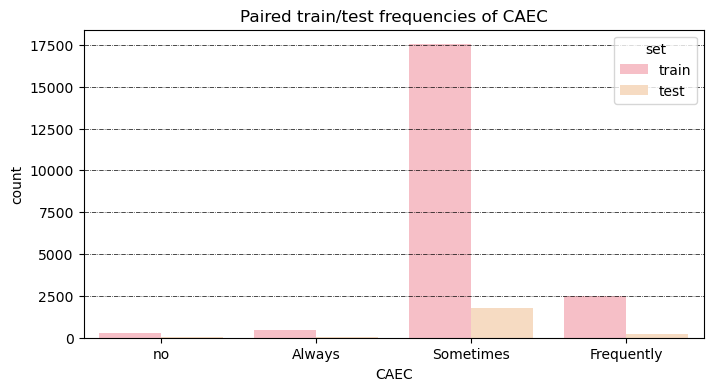

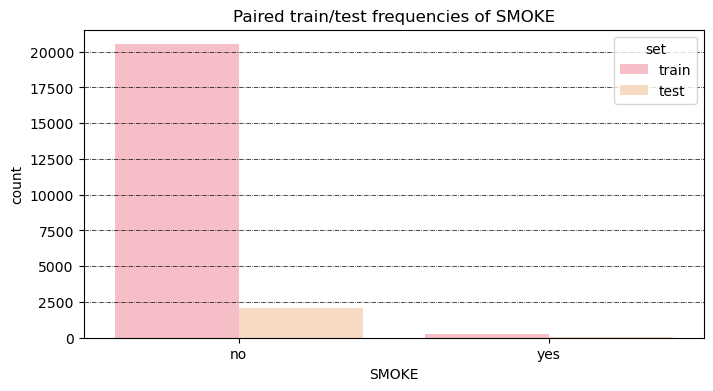

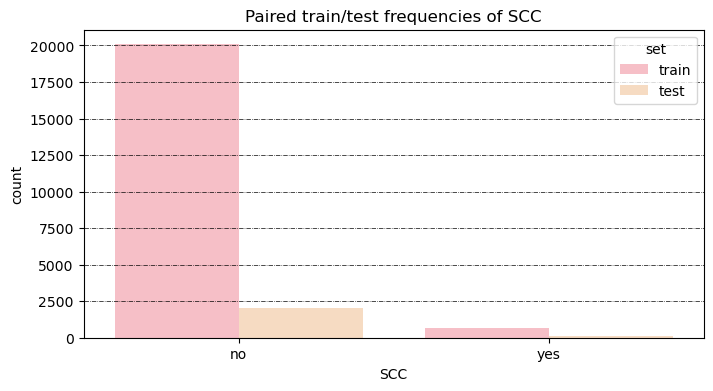

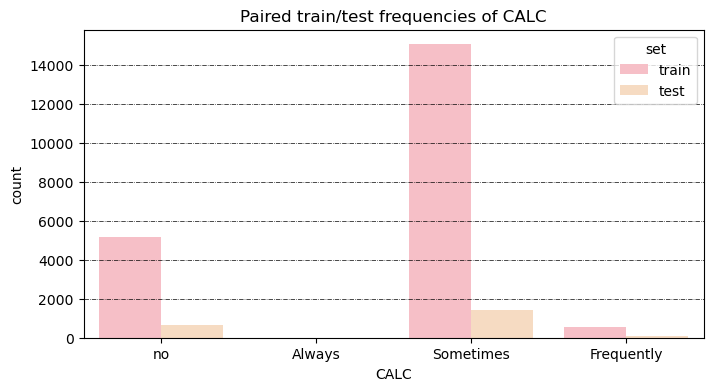

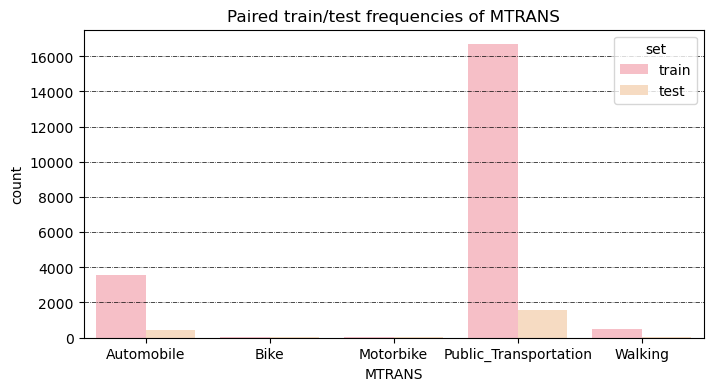

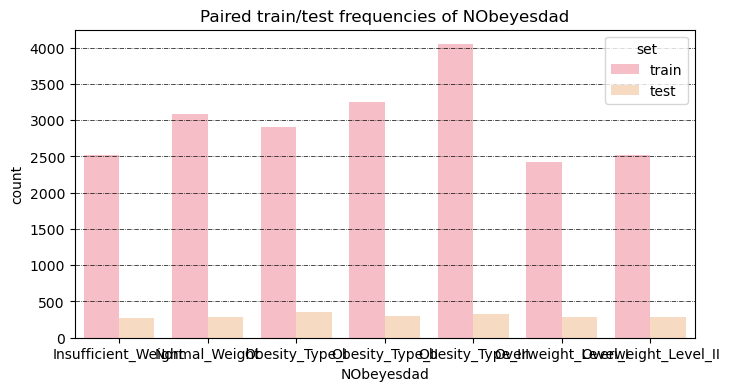

In [48]:
def plot_count_pairs(train_df, test_df, feature, hue="set", order=None, palette=None):
    data_df = train_df.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test_df.copy()]).fillna('test')
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax.set_title(f"Paired train/test frequencies of {feature}")
    plt.show()
    
for feature in categorical_features:
    if feature in ["CAEC", "CALC"]:
        order = ["no", "Always", "Sometimes", "Frequently"]
    else:
        order = sorted(train_df[feature].unique())
    plot_count_pairs(train_df, test_df, feature=feature, order=order, palette=color_list)

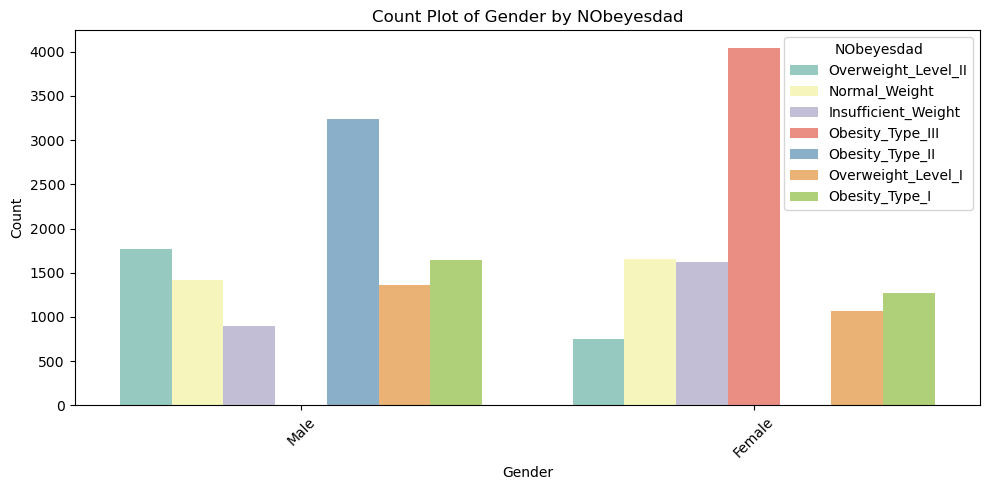

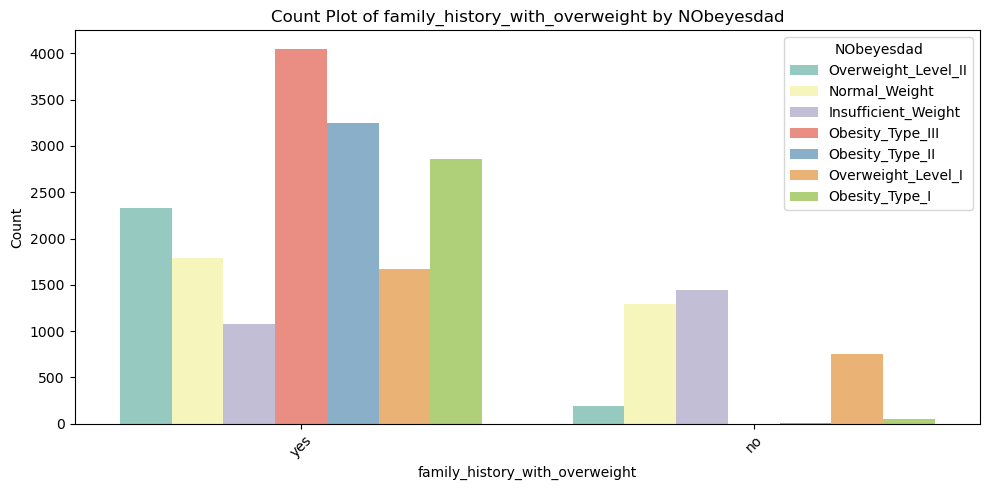

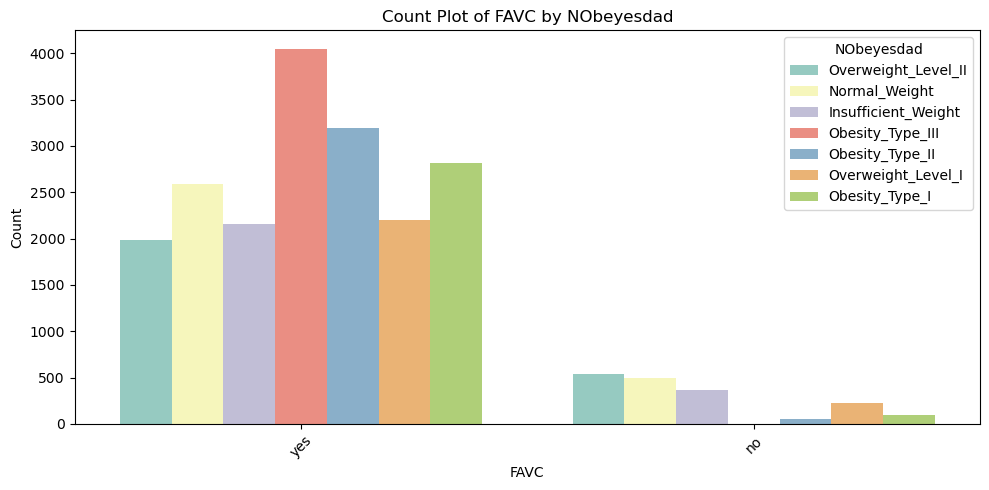

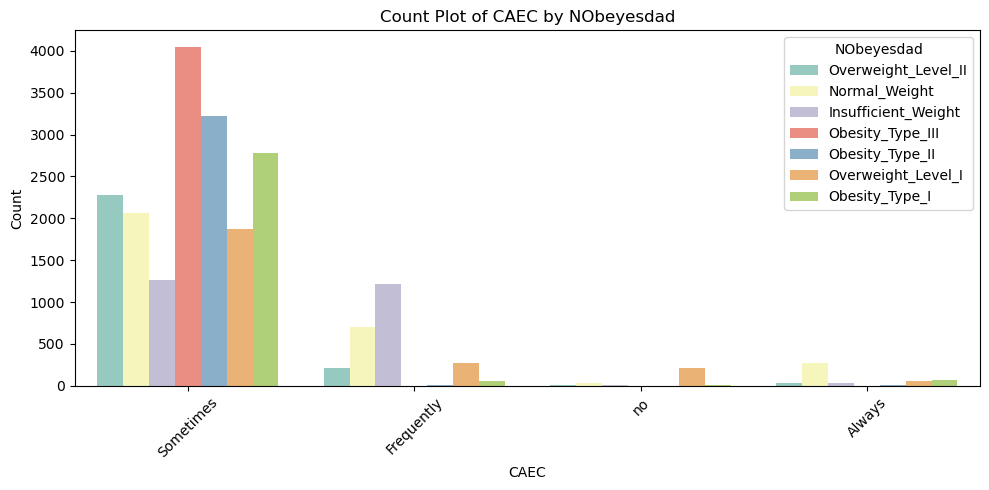

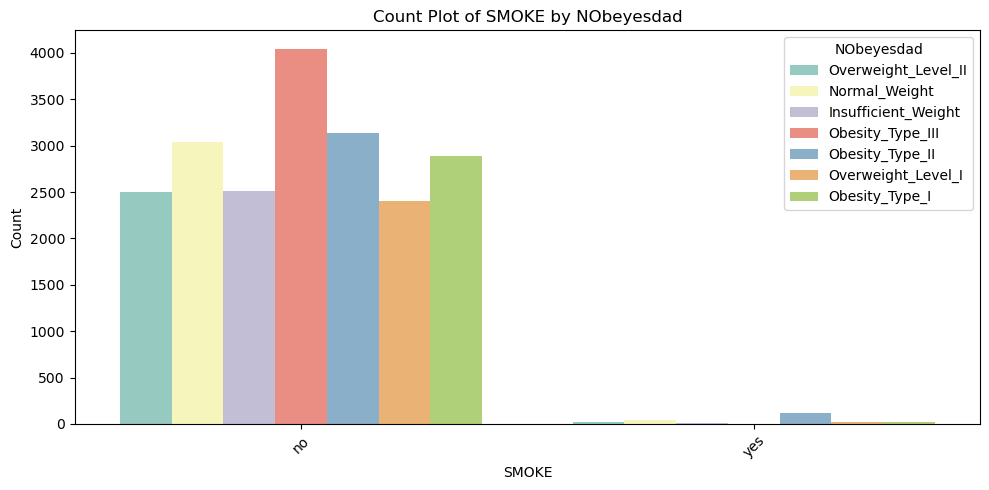

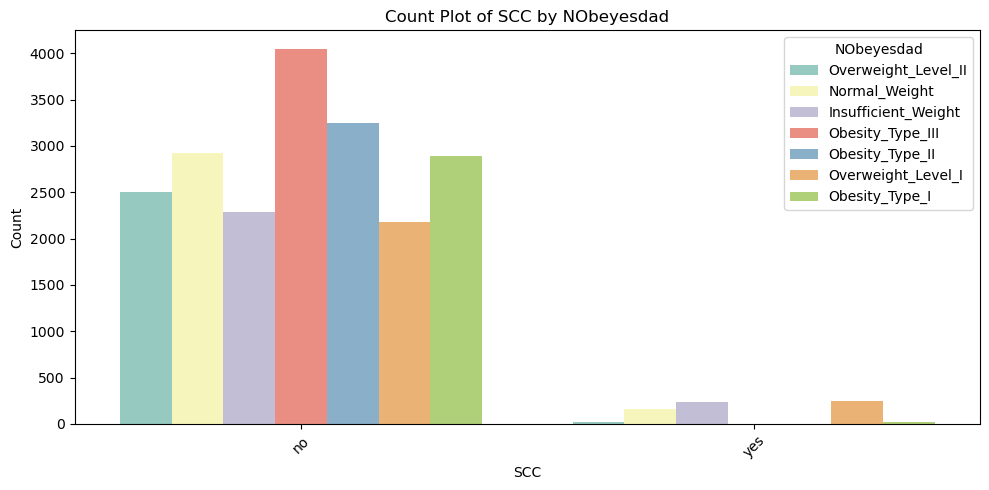

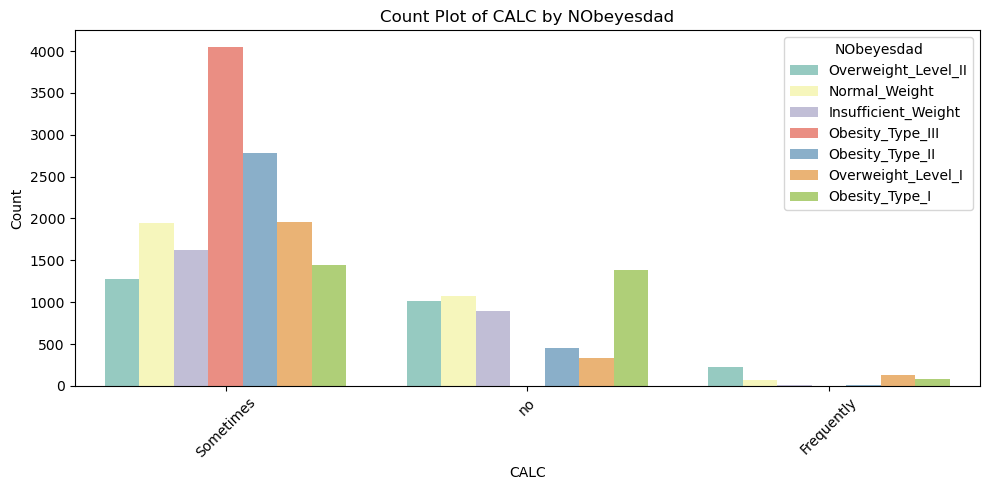

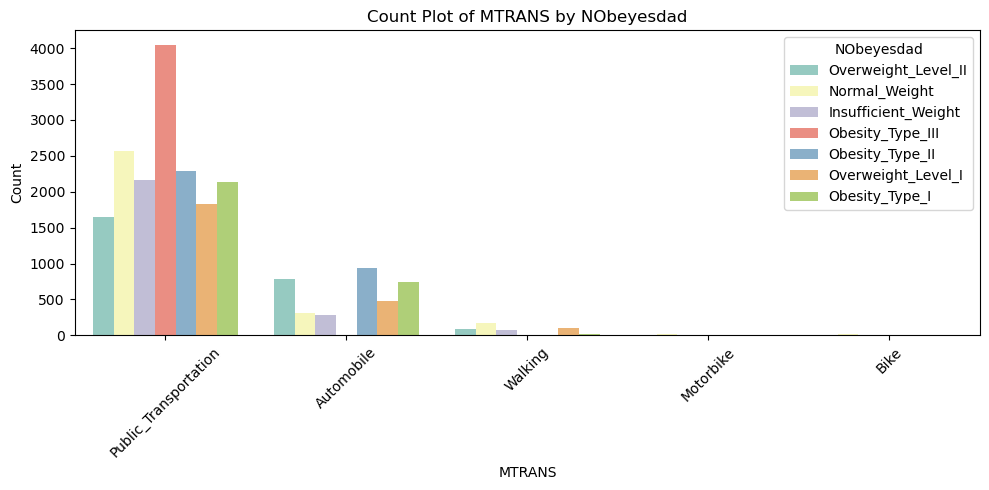

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x=var, hue='NObeyesdad', palette='Set3')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {var} by NObeyesdad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


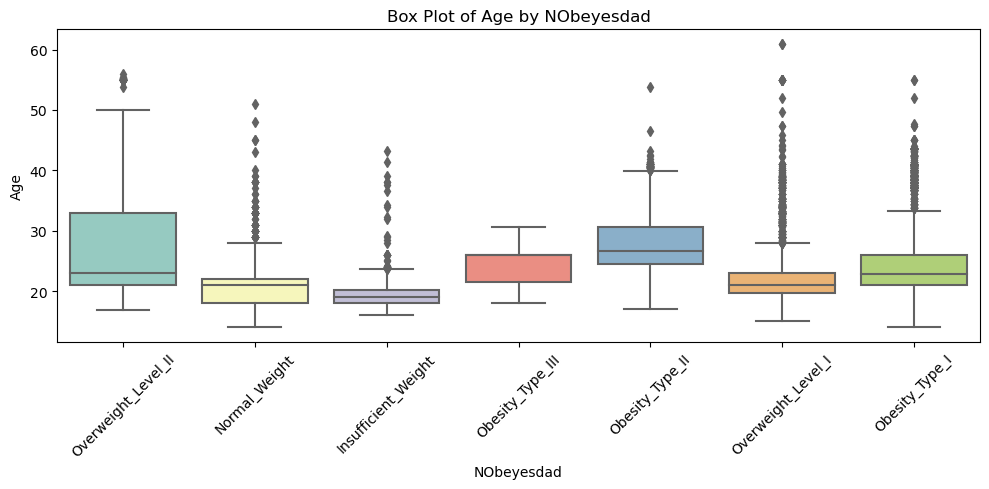

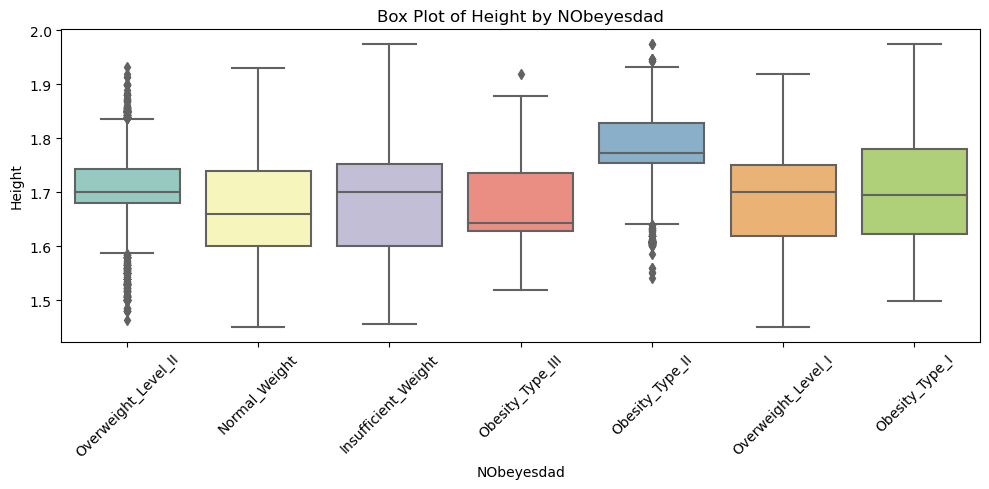

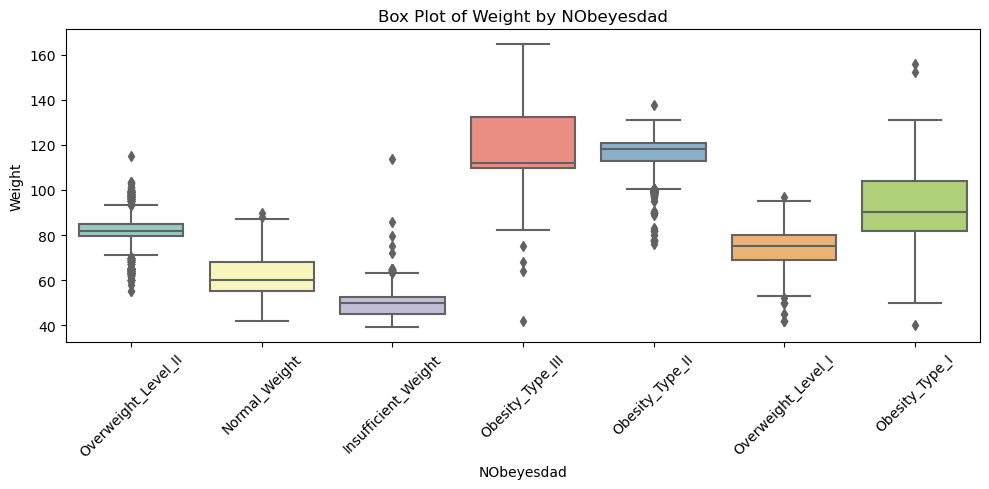

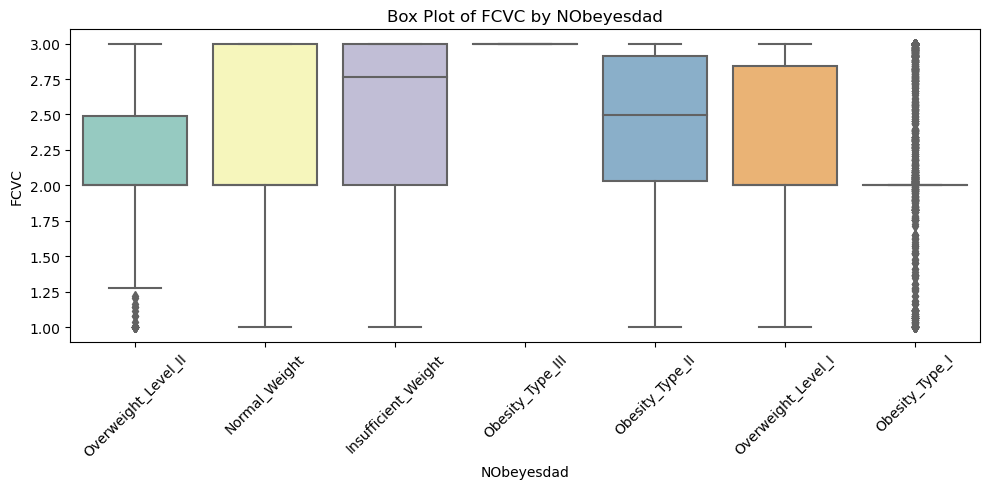

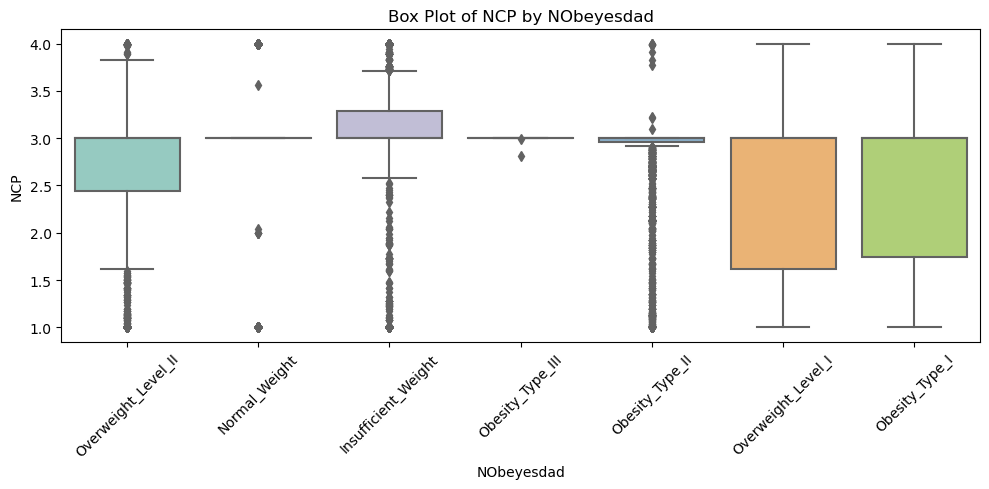

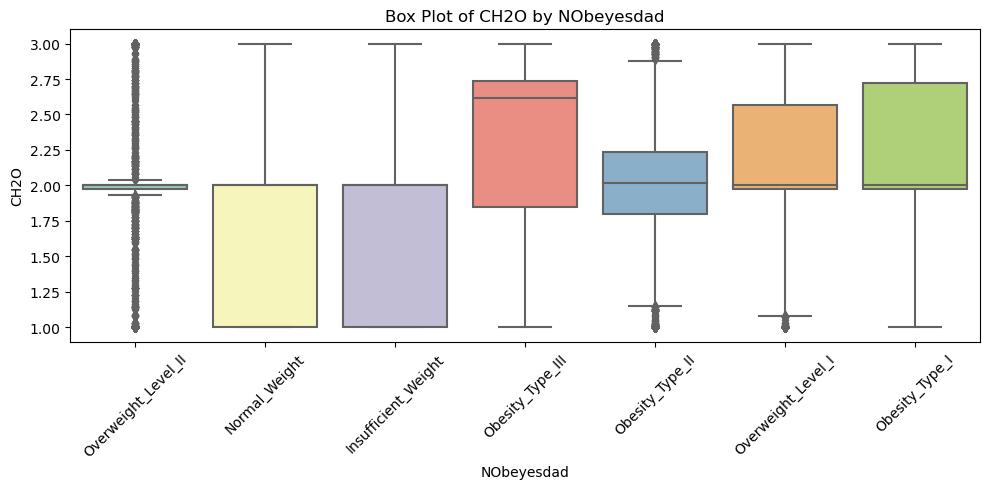

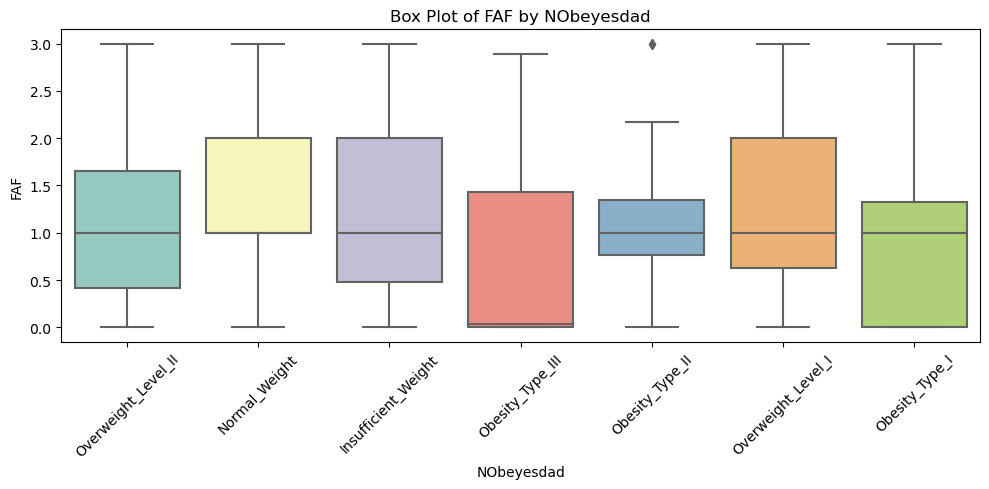

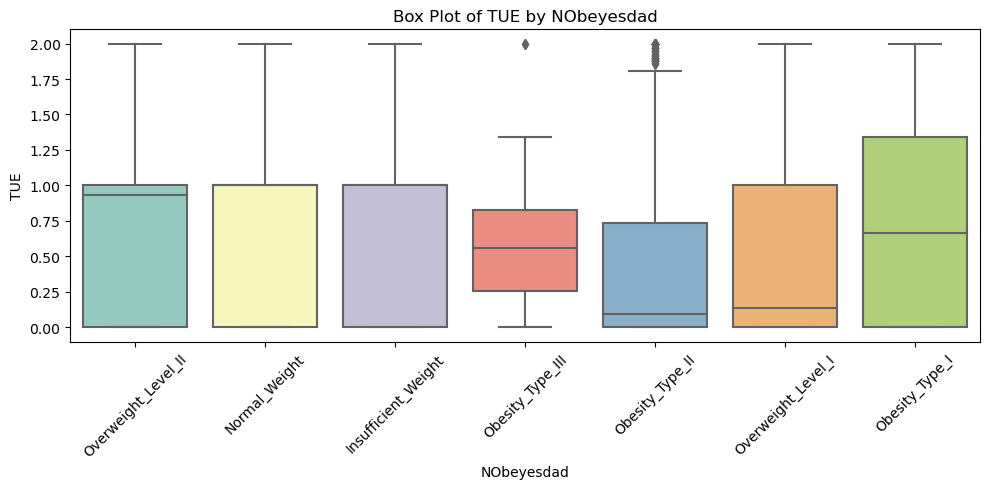

In [50]:
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x='NObeyesdad', y=var, palette='Set3')
    plt.xlabel('NObeyesdad')
    plt.ylabel(var)
    plt.title(f'Box Plot of {var} by NObeyesdad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


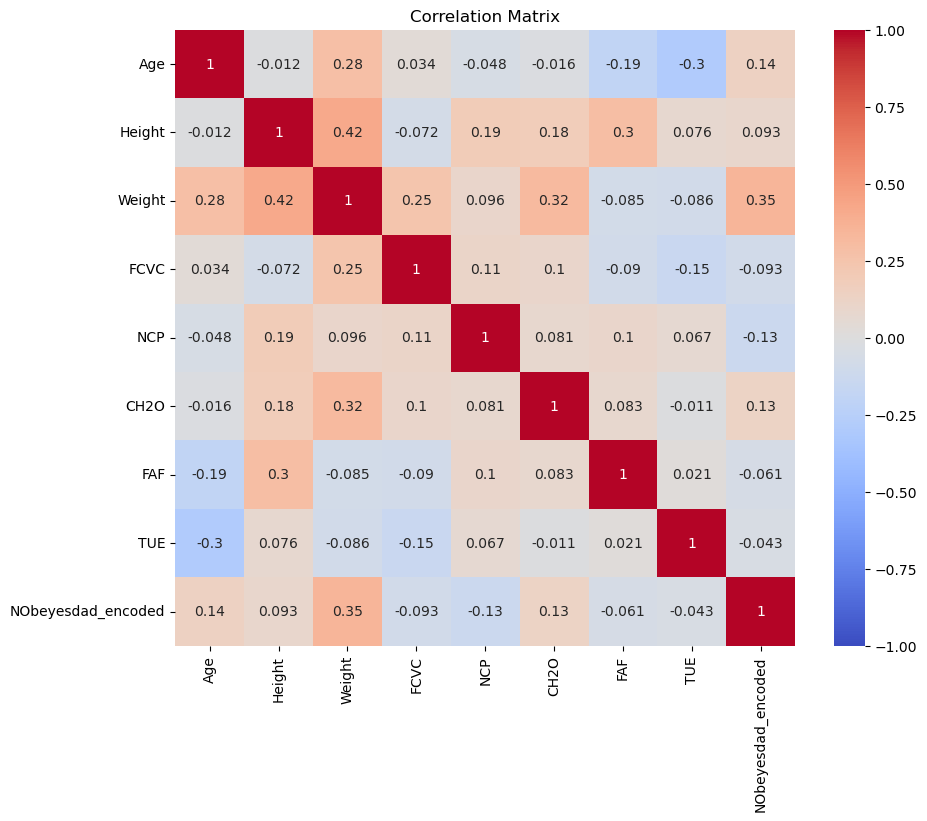

In [52]:


# Encode the target variable if needed
train_df['NObeyesdad_encoded'] = train_df['NObeyesdad'].factorize()[0]

# Calculate correlation matrix
corr_matrix = train_df[numerical_vars + ['NObeyesdad_encoded']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [59]:
train_df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
NObeyesdad_encoded                  int64
dtype: object

In [60]:
from scipy.stats import f_oneway
#to check Correlation between Numerical Features and Target variable
significance_level = 0.05


results_list = []
num_cols_train = train_df.select_dtypes(include=['float64', 'int32']).columns

for feature in num_cols_train:
    f_stat, p_value = f_oneway(*[subset[feature] for _, subset in train_df.groupby('NObeyesdad')])
    is_significant = p_value < significance_level
    results_list.append({
        'Feature': feature,
        'F-statistic': f_stat,
        'P-value': p_value,
        'Significant': is_significant
    })


results_df = pd.DataFrame(results_list)


def highlight_significant(val):
    color = 'background-color: lightgreen' if val else ''
    return color


results_df_styled = results_df.style.applymap(highlight_significant, subset=['Significant'])


results_df_styled

,Feature,F-statistic,P-value,Significant
0,Age,962.936496,0.000000,True
1,Height,759.579663,0.000000,True
2,Weight,22867.945866,0.000000,True
3,FCVC,1551.918278,0.000000,True
4,NCP,300.259705,0.000000,True
5,CH2O,385.818727,0.000000,True
6,FAF,282.714681,0.000000,True
7,TUE,147.188575,0.000000,True


In [61]:
##Chi-Square Test
#Null hypothesis: There is no significant relationship between the two variables
#Alternate Hypothesis: There is a significant relationship between the two variables

cat_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'object']

target_column = 'NObeyesdad'
cat_cols_train_no_target = [col for col in cat_cols_train if col != target_column]

results_list = []
for feature in cat_cols_train_no_target:
    contingency_table = pd.crosstab(train_df[feature], train_df[target_column])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    is_significant = p_value < 0.05
    results_list.append({
        'Feature': feature,
        'Chi2-statistic': chi2_stat,
        'P-value': p_value,
        'Significant': is_significant
    })
results_df = pd.DataFrame(results_list)
def highlight_significant(val):
    color = 'background-color: lightgreen' if val else ''
    return color
results_df_styled = results_df.style.applymap(highlight_significant, subset=['Significant'])
results_df_styled


,Feature,Chi2-statistic,P-value,Significant
0,Gender,7953.767544,0.000000,True
1,family_history_with_overweight,6423.317091,0.000000,True
2,FAVC,1553.629751,0.000000,True
3,CAEC,6897.329566,0.000000,True
4,SMOKE,216.300613,0.000000,True
5,SCC,1024.798467,0.000000,True
6,CALC,4013.082706,0.000000,True
7,MTRANS,2349.082568,0.000000,True
